1. Filter the data to include only weekdays (Monday to Friday) and
plot a line graph showing the pedestrian counts for each day of the
week.
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

----- Write your code below this after running above above code-----------

2. Track pedestrian counts on the Brooklyn Bridge for the year 2019
and analyze how different weather conditions influence pedestrian
activity in that year. Sort the pedestrian count data by weather
summary to identify any correlations( with a correlation matrix)
between weather patterns and pedestrian counts for the selected year.

-This question requires you to show the relationship between a
numerical feature(Pedestrians) and a non-numerical feature(Weather
Summary). In such instances we use Encoding. Each weather condition
can be encoded as numbers( 0,1,2..). This technique is called One-hot
encoding.

-Correlation matrices may not always be the most suitable
visualization method for relationships involving categorical
datapoints, nonetheless this was given as a question to help you
understand the concept better.

3. Implement a custom function to categorize time of day into morning,
afternoon, evening, and night, and create a new column in the
DataFrame to store these categories. Use this new column to analyze
pedestrian activity patterns throughout the day.


In [2]:

 #Q-1 import pandas as pd import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)
df

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
...,...,...,...,...,...,...,...,...,...,...,...,...
16052,06/22/2018 04:00:00 AM,Brooklyn Bridge,7,4,3,partly-cloudy-night,67.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16053,07/19/2018 06:00:00 AM,Brooklyn Bridge,192,89,103,clear-day,65.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16054,06/16/2018 04:00:00 PM,Brooklyn Bridge,2623,1161,1462,clear-day,82.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16055,07/24/2018 06:00:00 PM,Brooklyn Bridge,2016,1069,947,partly-cloudy-day,80.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


In [15]:
# Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week. 

df['day_of_week'] = df['hour_beginning'].dt.day_name()
df.head

<bound method NDFrame.head of            hour_beginning         location  Pedestrians  Towards Manhattan  \
0     2019-04-30 00:00:00  Brooklyn Bridge            3                  3   
1     2019-12-31 22:00:00  Brooklyn Bridge           10                  9   
2     2019-12-31 23:00:00  Brooklyn Bridge            2                  0   
3     2019-12-31 21:00:00  Brooklyn Bridge           12                  0   
4     2019-04-01 03:00:00  Brooklyn Bridge            1                  0   
...                   ...              ...          ...                ...   
16052 2018-06-22 04:00:00  Brooklyn Bridge            7                  4   
16053 2018-07-19 06:00:00  Brooklyn Bridge          192                 89   
16054 2018-06-16 16:00:00  Brooklyn Bridge         2623               1161   
16055 2018-07-24 18:00:00  Brooklyn Bridge         2016               1069   
16056 2018-07-23 00:00:00  Brooklyn Bridge           57                 20   

       Towards Brooklyn      weat

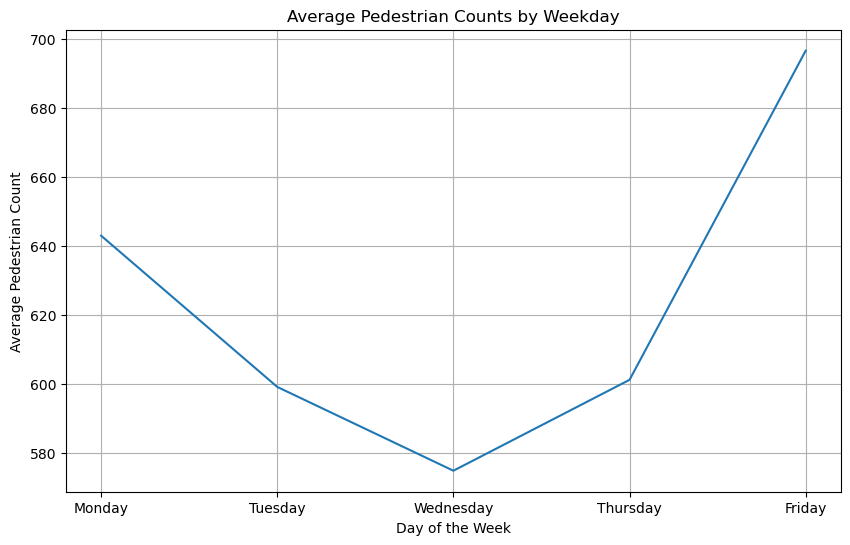

In [16]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
df_grouped = df_grouped.reindex(weekdays)
plt.figure(figsize=(10, 6))
plt.plot(df_grouped.index, df_grouped.values)
plt.title('Average Pedestrian Counts by Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Average Pedestrian Count')
plt.grid(True)
plt.show()

In [38]:
#Q-2 Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year. 
# Sort the pedestrian count data by weather summary to identify any correlations( with a correlation matrix) between weather patterns and pedestrian counts for the selected year.
import seaborn as sns
df_brooklyn_2019 = df_brooklyn_2019.sort_values(by='hour_beginning')
df_brooklyn_2019.reset_index(drop=True, inplace=True)


df_brooklyn_2019['temperature'] = df_brooklyn_2019['temperature'].ffill()
df_brooklyn_2019['precipitation'] = df_brooklyn_2019['precipitation'].ffill()
df_brooklyn_2019['weather_summary'] = df_brooklyn_2019['weather_summary'].ffill()
# Check the filled data
df_brooklyn_2019

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,day_of_week
0,2019-01-01 00:00:00,Brooklyn Bridge,144,24,120,rain,46.0,0.1363,40.708164,-73.999509,New Year's Day,"(40.7081639691088, -73.9995087014816)",Tuesday
1,2019-01-01 01:00:00,Brooklyn Bridge,39,20,19,rain,47.0,0.0490,40.708164,-73.999509,New Year's Day,"(40.7081639691088, -73.9995087014816)",Tuesday
2,2019-01-01 02:00:00,Brooklyn Bridge,15,10,5,rain,47.0,0.0279,40.708164,-73.999509,New Year's Day,"(40.7081639691088, -73.9995087014816)",Tuesday
3,2019-01-01 03:00:00,Brooklyn Bridge,14,10,4,cloudy,48.0,0.0044,40.708164,-73.999509,New Year's Day,"(40.7081639691088, -73.9995087014816)",Tuesday
4,2019-01-01 04:00:00,Brooklyn Bridge,8,6,2,cloudy,50.0,0.0003,40.708164,-73.999509,New Year's Day,"(40.7081639691088, -73.9995087014816)",Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,2019-12-31 19:00:00,Brooklyn Bridge,11,9,2,cloudy,43.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday
8757,2019-12-31 20:00:00,Brooklyn Bridge,15,14,1,cloudy,43.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday
8758,2019-12-31 21:00:00,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday
8759,2019-12-31 22:00:00,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",Tuesday


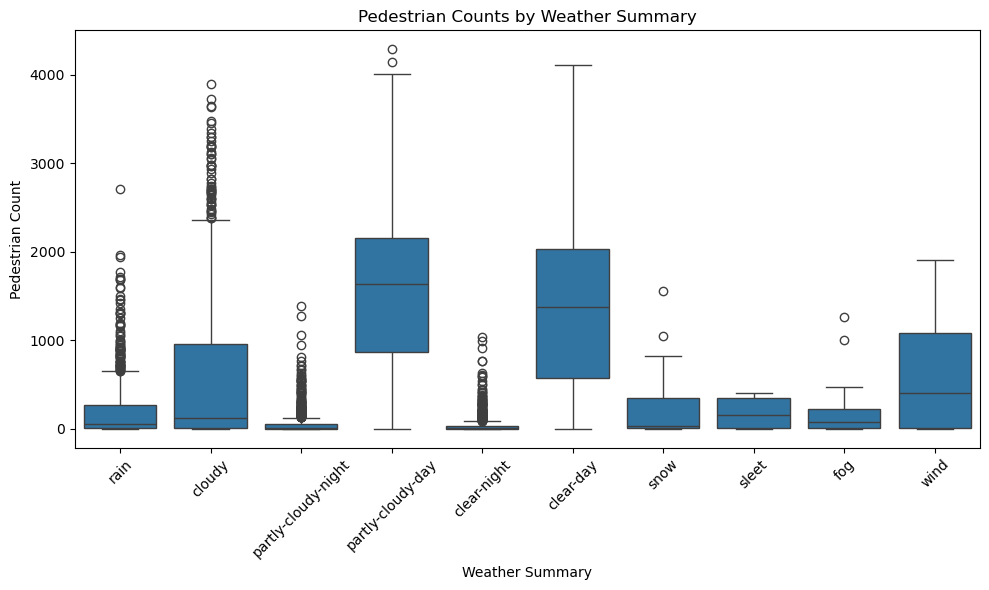

In [39]:
# Plotting a box plot of pedestrian counts by weather summary
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_brooklyn_2019, x='weather_summary', y='Pedestrians')
plt.title('Pedestrian Counts by Weather Summary')
plt.xlabel('Weather Summary')
plt.ylabel('Pedestrian Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

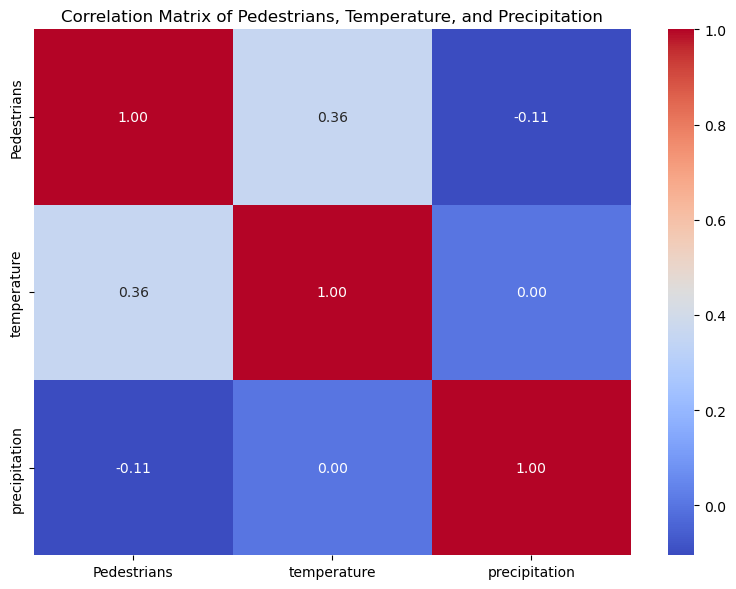

In [40]:
correlation_matrix = df_brooklyn_2019[['Pedestrians', 'temperature', 'precipitation']].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix of Pedestrians, Temperature, and Precipitation')
plt.tight_layout()
plt.show()

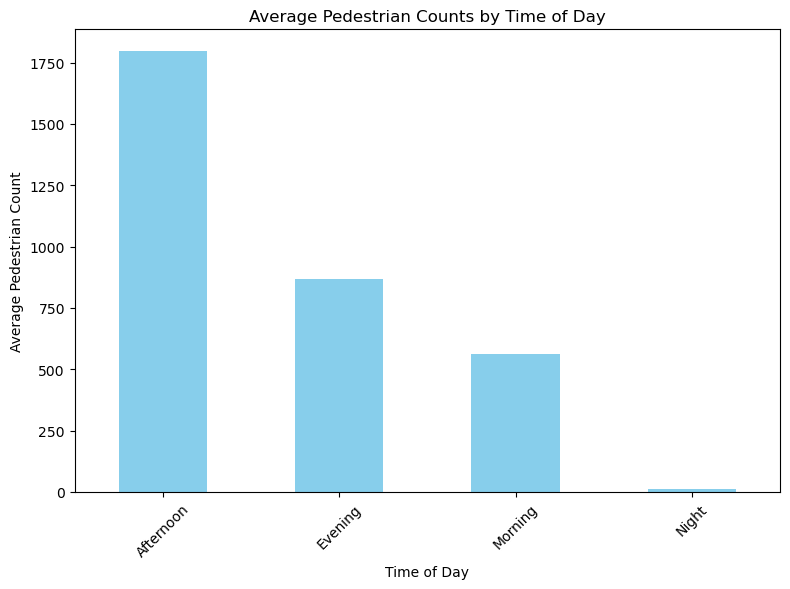

In [43]:
# Q-3 Implement a custom function to categorize time of day into morning, afternoon, evening, and night, and 
# create a new column in the DataFrame to store these categories. Use this new column to analyze pedestrian activity patterns throughout the day.

# Group by the 'time_of_day' column and calculate the average pedestrian counts
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df_brooklyn_2019['time_of_day'] = df_brooklyn_2019['hour_beginning'].dt.hour.apply(categorize_time_of_day)

#Display the first few rows to verify the new column
df_brooklyn_2019[['hour_beginning', 'time_of_day', 'Pedestrians']].head()

pedestrian_activity = df_brooklyn_2019.groupby('time_of_day')['Pedestrians'].mean()

# Plotting the pedestrian activity by time of day
plt.figure(figsize=(8, 6))
pedestrian_activity.plot(kind='bar', color='skyblue')
plt.title('Average Pedestrian Counts by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Pedestrian Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()